#General Information

Welcome to the final Assignment. We will be applying the concepts we have learned over this week to solve this week's assignments. So, Let's get started! Goodluck!

Please fill out your name and email in the below cell



In [ ]:
#NAME : Mayank Bhandari
#EMAIL :mayank10oct@yahoo.com

Hello folks!
We congratulate you for reaching the final assignments. We wish you luck for the same. In this notebook you're supposed to predict the asteroid size using various algorithms and find out the R2 Score. Fine tune the model to get best possible R2 Score.

Goal is to find the daimeter of the staeroid.

In [1]:
##Your Code
#Import all packages that will be used during this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#Read File and verify that it loaded properly.
file = '../input/prediction-of-asteroid-diameter/Asteroid_Updated.csv'
df = pd.read_csv(file,sep=',')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

In [3]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [4]:
new_columns_dict = {'name':'obj_name','a':'semi-major_axis(au)','e':'eccentricity',
                    'i':'x-y_inclination(deg)','om':'longitude_asc_node','w':'argument_perihelion',
                    'q':'perihelion_dist(au)','ad':'aphelion_dist(au)', 'per_y':'orbital_period',
                   'data_arc':'data_arc(d)','condition_code':'condition_code','n_obs_used':'n_obs_used',
                   'H':'abs_mag_para', 'neo':'near_earth_obj', 'pha':'physically_hazardous_asteroid',
                   'diameter':'diameter','extent':'axial_ellipsoid_dim(Km)','albedo':'geo_albedo',
                   'rot_per':'rot_per(h)','GM':'std_gravitational_para','BV':'bv_color_mag_diff',
                   'UB':'ub_color_mag_diff','IR':'ir_color_mag_diff','spec_B':'SMASSII_spec_tax_type',
                   'spec_T':'Tholen_spec_tax_type','G':'mag_slope_para','moid':'earth_min_oribit_inter_dist(au)',
                   'class':'class','n':'mean_motion(deg/d)','per':'orbital_period(d)','ma':'mean_anomaly(deg)'}
df = df.rename(columns = new_columns_dict)
df.columns

Index(['obj_name', 'semi-major_axis(au)', 'eccentricity',
       'x-y_inclination(deg)', 'longitude_asc_node', 'argument_perihelion',
       'perihelion_dist(au)', 'aphelion_dist(au)', 'orbital_period',
       'data_arc(d)', 'condition_code', 'n_obs_used', 'abs_mag_para',
       'near_earth_obj', 'physically_hazardous_asteroid', 'diameter',
       'axial_ellipsoid_dim(Km)', 'geo_albedo', 'rot_per(h)',
       'std_gravitational_para', 'bv_color_mag_diff', 'ub_color_mag_diff',
       'ir_color_mag_diff', 'SMASSII_spec_tax_type', 'Tholen_spec_tax_type',
       'mag_slope_para', 'earth_min_oribit_inter_dist(au)', 'class',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)'],
      dtype='object')

In [5]:
df.shape

(839714, 31)

In [6]:
#Missing values percentages at column level.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
eccentricity,0,0.000000
x-y_inclination(deg),0,0.000000
longitude_asc_node,0,0.000000
argument_perihelion,0,0.000000
perihelion_dist(au),0,0.000000
class,0,0.000000
n_obs_used,0,0.000000
orbital_period,1,0.000119
semi-major_axis(au),2,0.000238
mean_motion(deg/d),2,0.000238


In [7]:
#The target feature has a significant number of missing values.Daimeter
total_rows = len(df.index)
total_rows

839714

In [8]:
print("The total number of rows which have null data are : {}".format(total_rows))

The total number of rows which have null data are : 839714


In [9]:
#Calculate the number of non-null diameters. Since Diameter is our targer variable and this supervised learning we can't have rows with Nulls.
valid_rows = df['diameter'].notnull().sum()
valid_rows

137636

In [10]:
print("Total number of non null rows where the coloumn is our target fature which is daimeter {}".format(valid_rows))

Total number of non null rows where the coloumn is our target fature which is daimeter 137636


In [11]:
#Remove rows with missing diameter.
df = df.dropna(axis=0, subset=['diameter'])

#Check that matches valid_rows.
rows_after_drop=len(df.index)

In [12]:
#Missing values percentages at column level.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
diameter,0,0.000000
mean_motion(deg/d),0,0.000000
class,0,0.000000
earth_min_oribit_inter_dist(au),0,0.000000
orbital_period(d),0,0.000000
physically_hazardous_asteroid,0,0.000000
near_earth_obj,0,0.000000
n_obs_used,0,0.000000
condition_code,0,0.000000
mean_anomaly(deg),0,0.000000


In [13]:
#List of columns to drop.
drop_list = ['abs_mag_para','geo_albedo','obj_name','rot_per(h)','SMASSII_spec_tax_type',
             'bv_color_mag_diff','Tholen_spec_tax_type','ub_color_mag_diff','mag_slope_para',
             'axial_ellipsoid_dim(Km)','std_gravitational_para','ir_color_mag_diff']
df.drop(drop_list, axis=1, inplace=True)

In [14]:
print("Total numbers of coloumns after droping the invalid columns are : {}".format(len(df.columns)))

Total numbers of coloumns after droping the invalid columns are : 19


In [15]:
df.dtypes

semi-major_axis(au)                float64
eccentricity                       float64
x-y_inclination(deg)               float64
longitude_asc_node                 float64
argument_perihelion                float64
perihelion_dist(au)                float64
aphelion_dist(au)                  float64
orbital_period                     float64
data_arc(d)                        float64
condition_code                      object
n_obs_used                           int64
near_earth_obj                      object
physically_hazardous_asteroid       object
diameter                            object
earth_min_oribit_inter_dist(au)    float64
class                               object
mean_motion(deg/d)                 float64
orbital_period(d)                  float64
mean_anomaly(deg)                  float64
dtype: object

In [ ]:
df.select_dtypes('object').tail()

In [17]:
df['diameter'].iloc[15]
df.at[15,'diameter']=226
df['diameter'].iloc[15]

226

In [18]:
df['diameter'] = pd.to_numeric(df['diameter'])

In [19]:
df.select_dtypes('object').tail()

,condition_code,near_earth_obj,physically_hazardous_asteroid,class
797860,1,N,N,MBA
798077,2,N,N,MBA
798189,1,N,N,MBA
799752,2,N,N,MBA
810375,3,N,N,MBA


In [20]:
df['condition_code']=df['condition_code'].astype('int64')
df.condition_code.unique()

array([0, 1, 3, 2, 4, 5, 9, 7, 6, 8])

In [21]:
df.near_earth_obj.unique()

array(['N', 'Y'], dtype=object)

In [22]:
df.physically_hazardous_asteroid.unique()

array(['N', 'Y'], dtype=object)

In [23]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

Integer Features

In [24]:
df['n_obs_used'].unique()

array([1002, 8490, 7104, ...,    8,    5,   10])

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semi-major_axis(au),137636.0,2.814613,1.522740,0.626226,2.536714,2.750859,3.092537,3.891460e+02
eccentricity,137636.0,0.145485,0.077573,0.000489,0.089623,0.138543,0.191141,9.843482e-01
x-y_inclination(deg),137636.0,10.349182,6.835111,0.021855,5.120506,9.389963,13.738588,1.703236e+02
longitude_asc_node,137636.0,169.827629,102.713052,0.000738,82.334880,160.438430,256.268387,3.599909e+02
argument_perihelion,137636.0,181.904551,103.556464,0.004466,91.947943,183.669900,271.762261,3.599952e+02
perihelion_dist(au),137636.0,2.402609,0.516169,0.081882,2.068948,2.363897,2.685811,4.046567e+01
aphelion_dist(au),137636.0,3.226618,2.896374,0.999956,2.864438,3.167516,3.468608,7.722011e+02
orbital_period,137636.0,4.884248,25.532565,0.495569,4.040317,4.562581,5.438518,7.676743e+03
data_arc(d),137498.0,8969.818601,6165.176190,1.000000,6291.000000,7572.000000,9731.000000,7.268400e+04
condition_code,137636.0,0.485207,1.966078,0.000000,0.000000,0.000000,0.000000,9.000000e+00


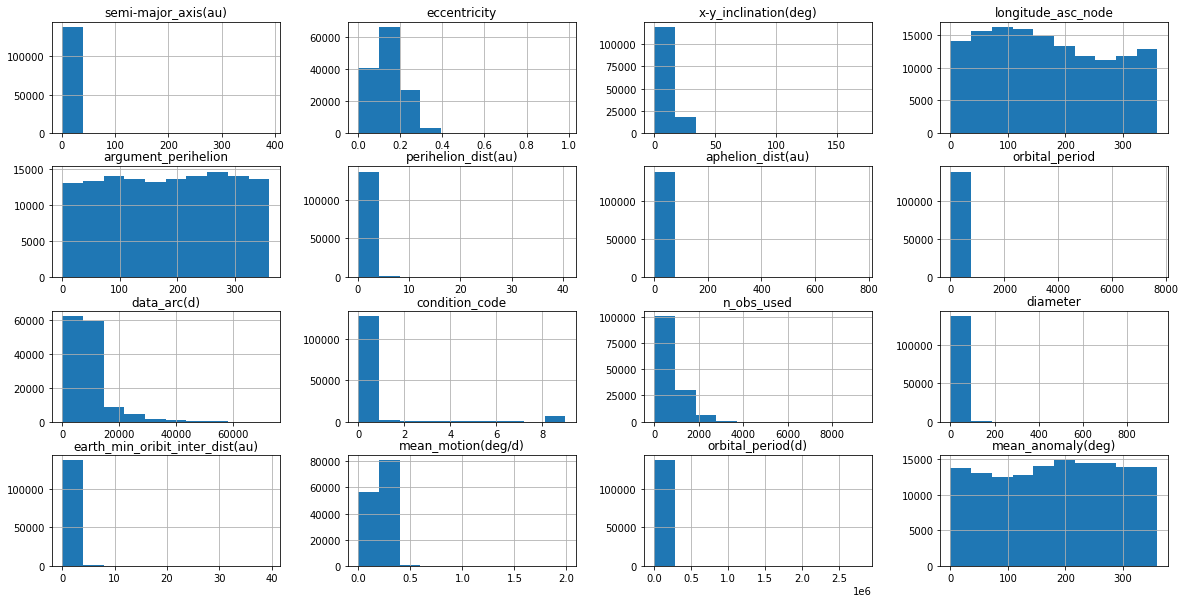

In [26]:
df.hist(figsize=(20,10));
plt.show;

<AxesSubplot:xlabel='data_arc(d)'>

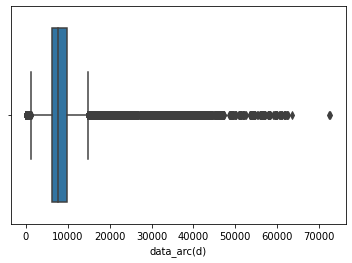

In [27]:
sns.boxplot(df['data_arc(d)'])

In [28]:
df['data_arc(d)'] = df['data_arc(d)'].fillna(df['data_arc(d)'].median())

In [29]:
df.drop('condition_code', axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   semi-major_axis(au)              137636 non-null  float64
 1   eccentricity                     137636 non-null  float64
 2   x-y_inclination(deg)             137636 non-null  float64
 3   longitude_asc_node               137636 non-null  float64
 4   argument_perihelion              137636 non-null  float64
 5   perihelion_dist(au)              137636 non-null  float64
 6   aphelion_dist(au)                137636 non-null  float64
 7   orbital_period                   137636 non-null  float64
 8   data_arc(d)                      137636 non-null  float64
 9   n_obs_used                       137636 non-null  int64  
 10  near_earth_obj                   137636 non-null  object 
 11  physically_hazardous_asteroid    137636 non-null  object 
 12  di

In [31]:
data_type = df.dtypes
data_type[(data_type == 'object')|(data_type == 'category')].index.tolist()

['near_earth_obj', 'physically_hazardous_asteroid', 'class']

In [32]:
drop_list = ['near_earth_obj', 'physically_hazardous_asteroid']
df.drop(drop_list, axis=1, inplace=True)

In [ ]:
df['class'] = df['class'].astype('category')
df['class'].dtypes

In [ ]:
#Set Plot Colors
sns.set_palette('inferno', 11)
sns.boxplot(x='class', y='diameter', data=df)
plt.yscale('log');

In [33]:
df['diameter'].describe()

count    137636.000000
mean          5.483228
std           9.385735
min           0.002500
25%           2.770000
50%           3.956000
75%           5.742000
max         939.400000
Name: diameter, dtype: float64

In [34]:
class_group = df.groupby('class').agg({
    'diameter':['mean','median','min','max','std','var','count']})
print(class_group)

         diameter                                                            
             mean   median     min      max         std           var   count
class                                                                        
AMO      1.766591   1.0450  0.0880   37.675    2.971932      8.832382     269
APO      0.958425   0.6025  0.0025    8.480    1.097541      1.204597     486
AST     14.283429  16.4000  2.6560   32.492   10.028549    100.571796       7
ATE      0.630716   0.3700  0.0230    3.879    0.702853      0.494002      95
CEN     52.473245  28.0000  0.8900  302.000   63.978581   4093.258785      49
IMB      2.288675   1.7460  0.7420   11.506    1.470614      2.162706     588
MBA      5.076341   3.8340  0.6000  939.400    8.277078     68.510018  126390
MCA      3.411217   2.5570  0.5870   42.870    3.512911     12.340547     355
OMB      8.783017   6.3565  0.3470  254.000   12.023403    144.562224    7510
TJN     20.771467  15.4710  4.5620  225.000   16.487683    271.8

In [ ]:
df.head()

In [35]:
df.select_dtypes(include=['object']).head()

,class
0,MBA
1,MBA
2,MBA
3,MBA
4,MBA


In [36]:
df = pd.get_dummies(df, columns=['class'])

In [37]:
df.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'aphelion_dist(au)', 'orbital_period', 'data_arc(d)', 'n_obs_used',
       'diameter', 'earth_min_oribit_inter_dist(au)', 'mean_motion(deg/d)',
       'orbital_period(d)', 'mean_anomaly(deg)', 'class_AMO', 'class_APO',
       'class_AST', 'class_ATE', 'class_CEN', 'class_IMB', 'class_MBA',
       'class_MCA', 'class_OMB', 'class_TJN', 'class_TNO'],
      dtype='object')

Saving the EDA data to another CSV 

In [38]:
df.to_csv('daimeterEDAfile.csv',index=False)

In [39]:
df_daimeter=pd.read_csv('./daimeterEDAfile.csv')

In [40]:
df_daimeter['diameter']

0         939.400
1         545.000
2         246.596
3         525.400
4         106.699
           ...   
137631      3.793
137632      2.696
137633      2.917
137634      3.271
137635      1.600
Name: diameter, Length: 137636, dtype: float64

In [41]:
X = df_daimeter.drop("diameter",axis=1)   #Feature Matrix
y = df_daimeter["diameter"]


In [65]:
#Standarize the features

#Apply a standard scaler to the data.
SS_scaler = StandardScaler()

# Fit the standard scaler to the data.
x_std = SS_scaler.fit_transform(X)

In [51]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((96345, 25), (41291, 25))

In [53]:
X_train.corr()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),orbital_period,data_arc(d),n_obs_used,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
semi-major_axis(au),1.000000,0.017544,0.141350,0.001304,-0.002909,0.355440,0.986021,0.939475,-0.020169,-0.050183,...,-0.041303,0.010668,-0.033747,0.162576,-0.039614,-0.157691,-0.013764,0.087659,0.189595,0.634292
eccentricity,0.017544,1.000000,0.143669,-0.000818,0.012386,-0.522837,0.111611,0.044553,-0.025218,-0.074000,...,0.292921,0.022417,0.091487,0.098207,-0.053697,-0.035790,0.118851,-0.041794,-0.107266,0.063226
x-y_inclination(deg),0.141350,0.143669,1.000000,-0.012878,-0.004992,0.085988,0.133002,0.087601,-0.197331,-0.224718,...,0.062250,0.014217,0.030004,0.106072,0.111236,-0.143508,0.060975,0.046521,0.072385,0.059511
longitude_asc_node,0.001304,-0.000818,-0.012878,1.000000,-0.108468,0.000014,0.001366,0.001403,-0.002159,-0.024166,...,0.002770,0.002267,-0.000677,0.003702,0.007064,-0.002359,0.006871,-0.005580,0.005518,0.002695
argument_perihelion,-0.002909,0.012386,-0.004992,-0.108468,1.000000,-0.006304,-0.001929,-0.001696,-0.005028,0.010022,...,0.005954,0.001022,0.002542,-0.001131,-0.005330,-0.001148,-0.008315,0.003410,0.000473,-0.002663
perihelion_dist(au),0.355440,-0.522837,0.085988,0.000014,-0.006304,1.000000,0.194733,0.093133,-0.020345,-0.083211,...,-0.191654,0.009658,-0.096548,0.168610,-0.083674,-0.353557,-0.081002,0.239893,0.562721,0.179059
aphelion_dist(au),0.986021,0.111611,0.133002,0.001366,-0.001929,0.194733,1.000000,0.969267,-0.017538,-0.037828,...,-0.009179,0.009473,-0.018203,0.140548,-0.026655,-0.102453,-0.000004,0.049224,0.098648,0.633696
orbital_period,0.939475,0.044553,0.087601,0.001403,-0.001696,0.093133,0.969267,1.000000,-0.007700,-0.010526,...,-0.005539,0.001781,-0.004060,0.044438,-0.005668,-0.039899,-0.002161,0.012013,0.032042,0.543475
data_arc(d),-0.020169,-0.025218,-0.197331,-0.002159,-0.005028,-0.020345,-0.017538,-0.007700,1.000000,0.754928,...,-0.028133,0.001317,-0.011769,-0.010899,0.006640,0.006475,0.010300,-0.015554,0.026675,-0.007787
n_obs_used,-0.050183,-0.074000,-0.224718,-0.024166,0.010022,-0.083211,-0.037828,-0.010526,0.754928,1.000000,...,-0.024828,-0.002473,-0.009256,-0.013243,0.016621,0.045646,0.001868,-0.038821,-0.026113,-0.007777


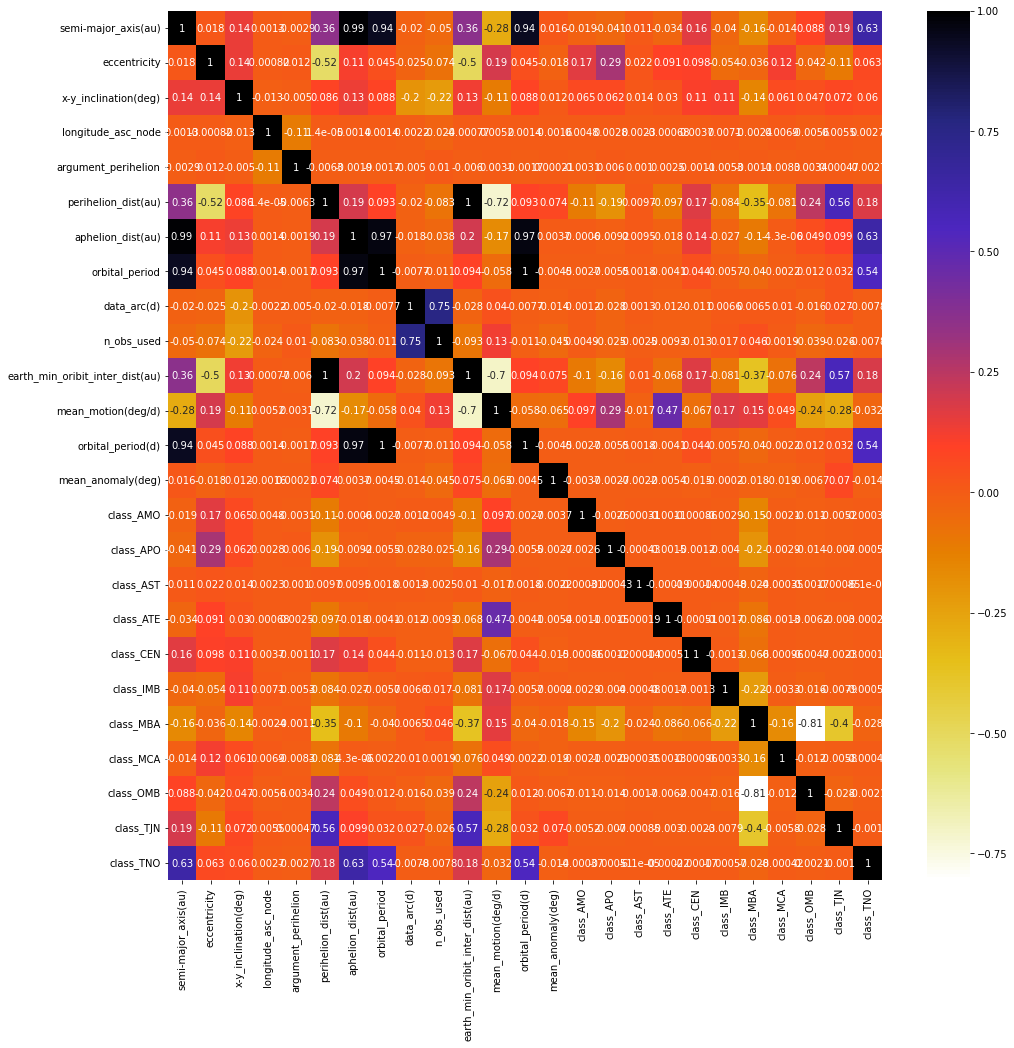

In [55]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(16,16))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [56]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [57]:
corr_features = correlation(X_train, 0.90)
len(set(corr_features))

4

In [58]:
corr_features

{'aphelion_dist(au)',
 'earth_min_oribit_inter_dist(au)',
 'orbital_period',
 'orbital_period(d)'}

In [60]:
drop_list=['aphelion_dist(au)','earth_min_oribit_inter_dist(au)','orbital_period','orbital_period(d)']

In [61]:
X_train.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'aphelion_dist(au)', 'orbital_period', 'data_arc(d)', 'n_obs_used',
       'earth_min_oribit_inter_dist(au)', 'mean_motion(deg/d)',
       'orbital_period(d)', 'mean_anomaly(deg)', 'class_AMO', 'class_APO',
       'class_AST', 'class_ATE', 'class_CEN', 'class_IMB', 'class_MBA',
       'class_MCA', 'class_OMB', 'class_TJN', 'class_TNO'],
      dtype='object')

In [62]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [63]:
X_train.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'data_arc(d)', 'n_obs_used', 'mean_motion(deg/d)', 'mean_anomaly(deg)',
       'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN',
       'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN',
       'class_TNO'],
      dtype='object')

In [64]:
X_train.shape

(96345, 21)

In [66]:
from sklearn.metrics import mean_squared_error      #for getting the mean squared error
from sklearn.metrics import r2_score 

In [67]:
def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(y_test,prediction, c='orange',label='predictions')
    ax2.plot(y_test,y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated $\log(radius)$')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled')

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

diameterPredictionLR  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPredictionLR)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPredictionLR)
print("R2 Score : ",r2)

root mean square error : 8.428711037010665
R2 Score :  0.38492213533154807


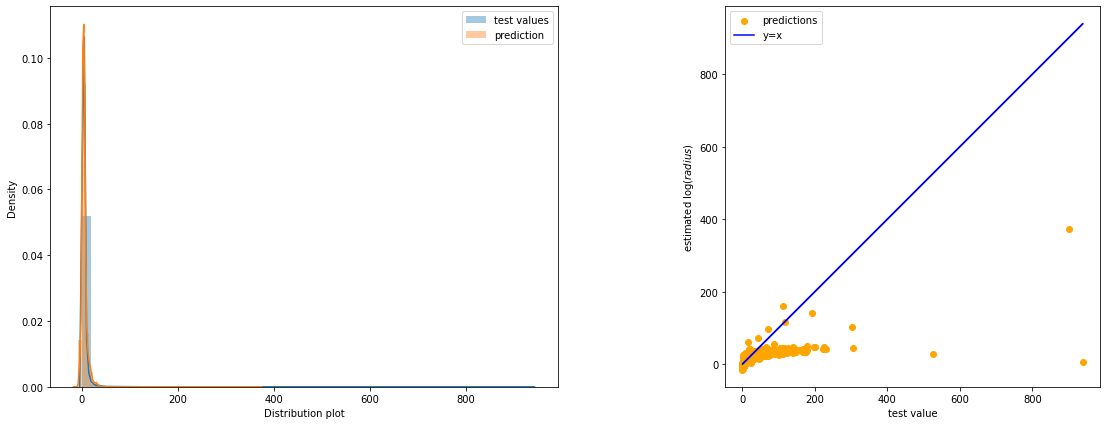

In [74]:
plot(diameterPredictionLR)

In [76]:
clf_lr=LinearRegression()
clf_lr.fit(X_train, y_train)
accuracies=cross_val_score(estimator=clf_lr, X=X_train, y=y_train,cv=5,verbose=1)
clf_lr.predict(X_test)
diameterPredictionCLF  = model.predict(X_test)
print(accuracies)
rmse = mean_squared_error(y_test, diameterPredictionCLF)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPredictionCLF)
print("R2 Score : ",r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.40334618 0.38025464 0.43347811 0.48445095 0.42979287]
root mean square error : 8.428711037010665
R2 Score :  0.38492213533154807


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


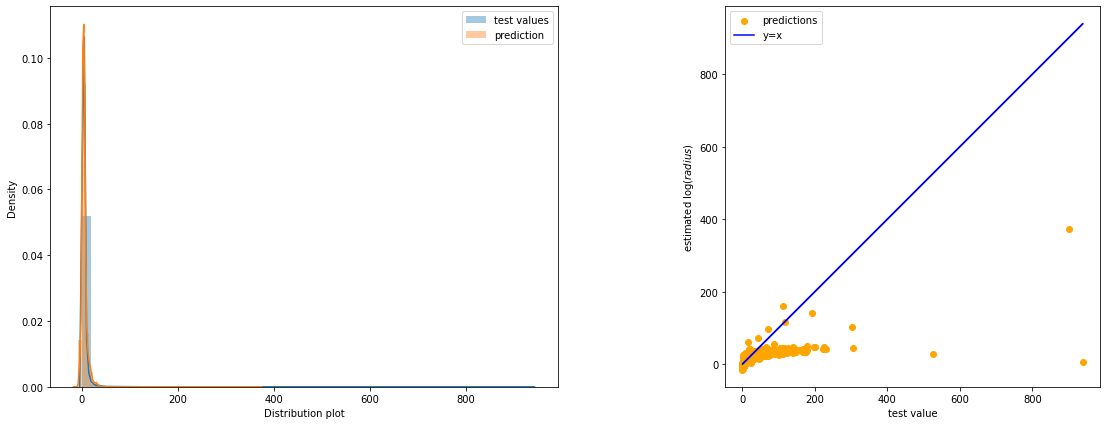

In [77]:
plot(diameterPredictionCLF)

In [82]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.predict(X_test)
diameterPrediction_DT  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction_DT)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(y_test,diameterPrediction_DT)
print("R2 Score : ",r2) 

root mean square error : 8.257784099766903
R2 Score :  0.40961567823677647


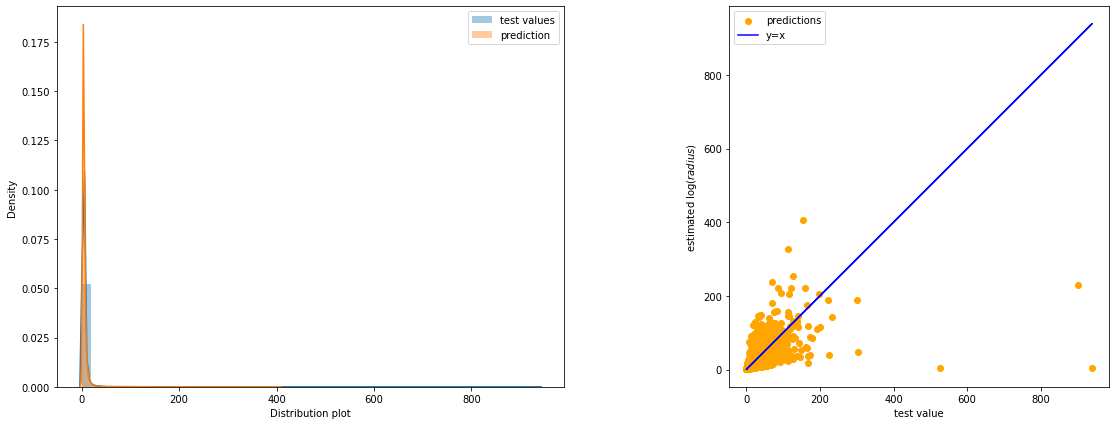

In [83]:
plot(diameterPrediction_DT)

In [84]:

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.predict(X_test)

diameterPredictionGBR  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPredictionGBR)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPredictionGBR)
print("R2 Score : ",r2)


root mean square error : 7.227762299155646
R2 Score :  0.5477115571034716


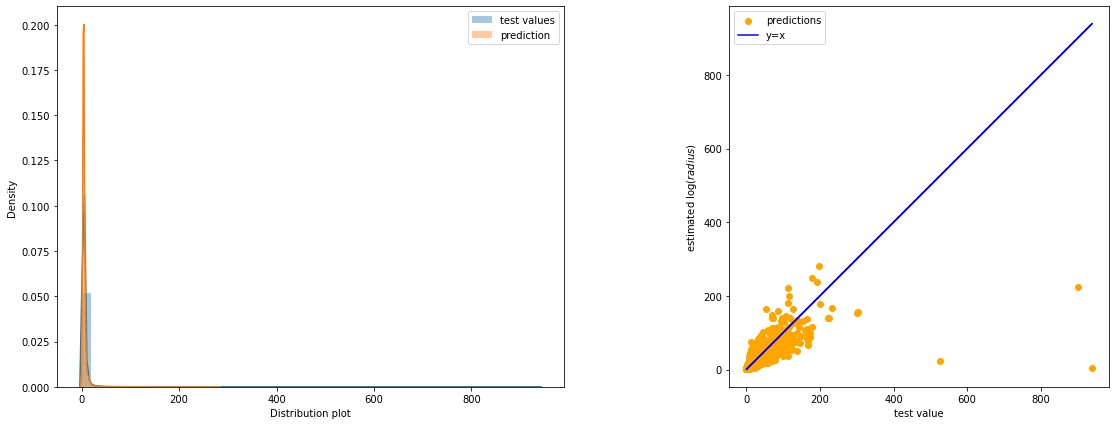

In [85]:
plot(diameterPredictionGBR)

In [86]:
from xgboost.sklearn import XGBRegressor
modelxgb = XGBRegressor()
modelxgb.fit(X_train, y_train)
modelxgb.predict(X_test)
diameterPredictionXBR  = modelxgb.predict(X_test)
mse = mean_squared_error(y_test, diameterPredictionXBR)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(y_test,diameterPredictionXBR)
print("R2 Score : ",r2) 

root mean square error : 7.14460728799066
R2 Score :  0.5580587982497223


In [99]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)
model.predict(X_test)

PredictionKNN  = model.predict(X_test)
mse = mean_squared_error(y_test, PredictionKNN)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,PredictionKNN)
print("R2 Score : ",r2)

root mean square error : 9.079175648100696
R2 Score :  0.2863248021750675


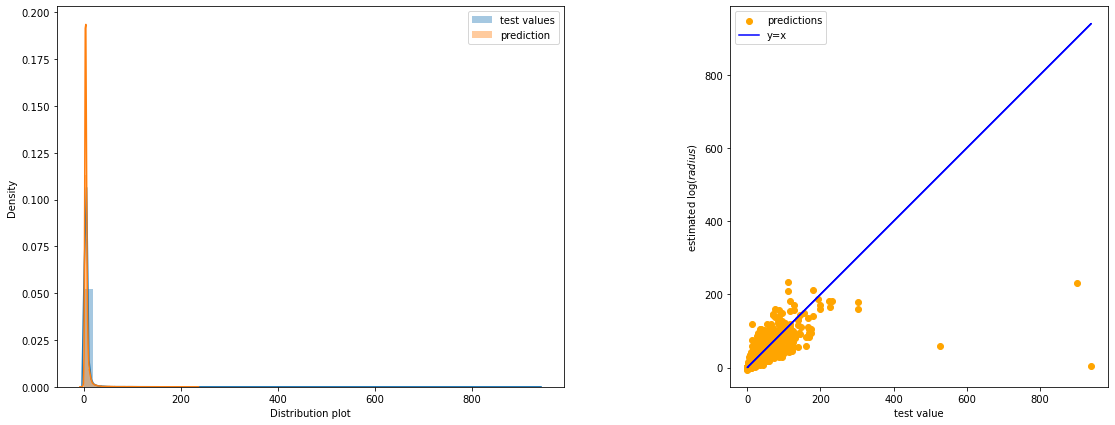

In [87]:
plot(diameterPredictionXBR)

In [88]:
from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor(n_jobs=-1, random_state=42)
model = RandomForestRegressor(max_depth=32, n_estimators=42)
model.fit(X_train, y_train)
model.predict(X_test)
diameterPredictionRF  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPredictionRF)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(y_test,diameterPredictionRF)
print("R2 Score : ",r2)
print(model.get_params())

root mean square error : 7.215168006959615
R2 Score :  0.5492863985948917
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 32, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 42, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


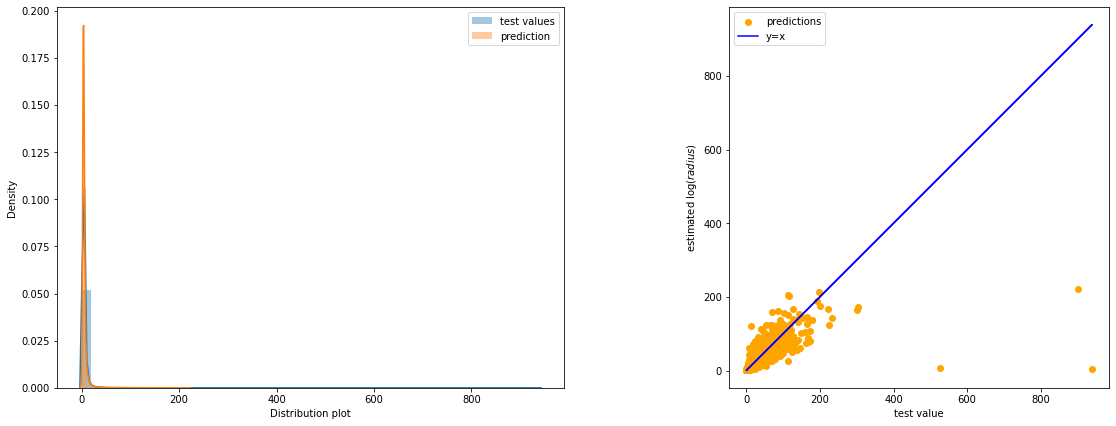

In [89]:
plot(diameterPredictionRF)

**Applying Cross validation in Random Forest Regressor**

In [90]:
from sklearn.ensemble import RandomForestRegressor
clf_lr=RandomForestRegressor()
clf_lr.fit(X_train, y_train)
accuracies=cross_val_score(estimator=clf_lr, X=X_train, y=y_train,cv=5,verbose=1)
clf_lr.predict(X_test)
diameterPredictionRFSC  = model.predict(X_test)
print(accuracies)
mse = mean_squared_error(y_test, diameterPredictionRFSC)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(y_test,diameterPredictionRFSC)
print("R2 Score : ",r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.0min finished


[0.75783148 0.71331847 0.81063735 0.77274276 0.79857266]
root mean square error : 7.215168006959615
R2 Score :  0.5492863985948917


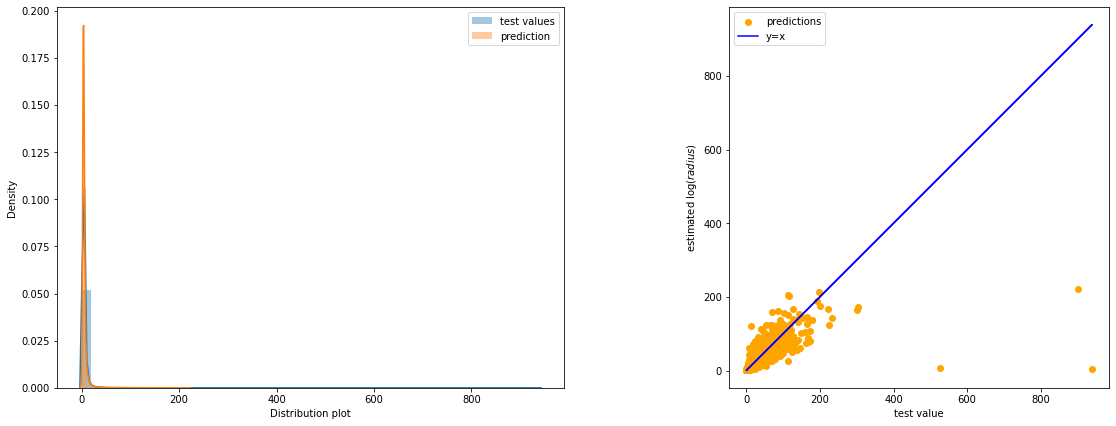

In [91]:
plot(diameterPredictionRFSC)

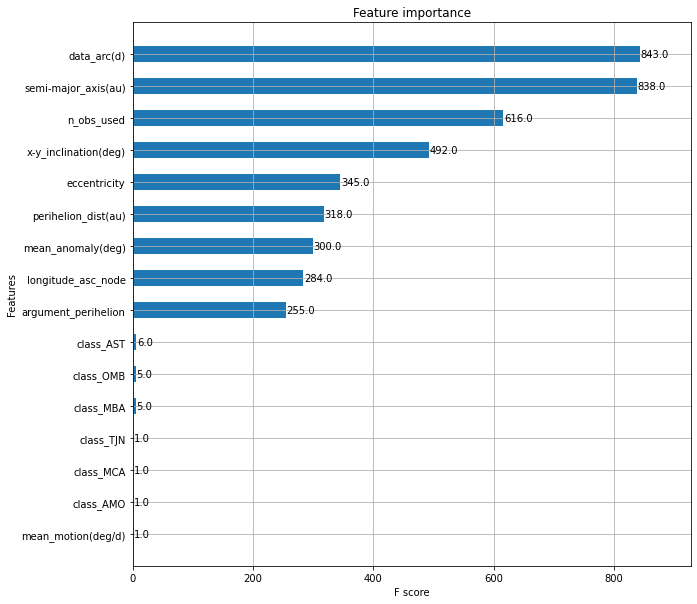

In [92]:

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(modelxgb, height=0.5, ax=ax, importance_type='weight')
plt.show()

In [95]:
drop_list=['class_AST','class_OMB','class_MBA','class_TJN','class_MCA','class_AMO']

In [96]:
X_train.drop(drop_list,axis=1,inplace=True)
X_test.drop(drop_list,axis=1,inplace=True)

In [97]:
from xgboost.sklearn import XGBRegressor
modelxgb = XGBRegressor()
modelxgb.fit(X_train, y_train)
modelxgb.predict(X_test)
diameterPredictionXBR  = modelxgb.predict(X_test)
mse = mean_squared_error(y_test, diameterPredictionXBR)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(y_test,diameterPredictionXBR)
print("R2 Score : ",r2)

root mean square error : 7.178271893210143
R2 Score :  0.5538842294568236


1. **Linear Regression Score**
   
   root mean square error : 8.783951558683288
   R2 Score :  0.3879156396609077

2. **Linear Regression With Cross Validation**
 
    root mean square error : 7.6307912482201115
    R2 Score :  0.5380759604539093

3. **Gradient Boosting**
 
    root mean square error : 7.227762299155646
    R2 Score :  0.5477115571034716
    
4. **knn nearest neighbor**

   root mean square error : 8.447643660141676   
   R2 Score :  0.4338877002185365
    
5. **DecisionTreeRegressor**
 
   root mean square error : 8.257784099766903
   R2 Score :  0.40961567823677647

    
6. **XGBRegressor**
  
     root mean square error : 7.14460728799066   
     R2 Score :  0.5580587982497223
     
7. **RandomForestRegressor**  
     
     root mean square error : 7.215168006959615
     R2 Score :  0.5492863985948917

     
8.  **RandomForestRegressorvalidation**

    root mean square error : 7.215168006959615
    R2 Score :  0.5492863985948917
  
  
 
     
    

**Conclusion**

XGB Regressor shows the better R2 score. We can further optimize it by using feature selection and validation techniques